
Nombre: Sandro Ramos Banda  

Codigo: 171917


In [ ]:
#LIBRERIAS
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from keras.layers.advanced_activations import LeakyReLU
import numpy as np
import pandas as pd

In [ ]:
#IMPORTAMOS EL DATASET
dataset = pd.read_csv('/content/heladas_train.csv', sep=',',header=None)
dataset.head(200)

,0,1,2,3,4,5,6
0,0.309834,0.024808,0.345034,0.859595,0.000,0.739726,0
1,-0.300064,-0.290056,0.030243,0.169555,0.000,0.526027,1
2,0.364995,0.204847,0.314858,0.760405,0.250,0.545205,0
3,-0.060152,0.204794,0.259792,0.650101,0.000,0.542466,0
4,-0.119802,-0.219979,0.034909,0.229922,0.000,0.531507,1
...,...,...,...,...,...,...,...
195,-0.024908,0.114774,0.190191,0.390008,0.875,0.438356,0
196,0.040232,0.085185,0.365200,0.740491,0.000,0.427397,0
197,0.025147,0.035027,0.315016,0.769982,0.750,0.558904,0
198,0.324869,0.529925,0.299822,0.650318,0.000,0.509589,1


In [ ]:
X = dataset.drop([6], axis=1)
y = dataset[6]

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [ ]:
# Adicionalmente se normalizarán las intensidades al rango 0-1
scaler = MinMaxScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)


**VARIABLES DE ENTRADA QUE SE NOS PROPORCIONO **

In [ ]:

modelo = Sequential()

# Capa de entrada: 11 neuronas
# segunda capa 500 neuronas
# RELU que reemplaza valores negativos por CEROS
modelo.add(Dense(20, input_dim=6, activation='relu'))

modelo.add(Dense(1, activation='softmax')) 
# sumario
modelo.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                140       
                                                                 
 dense_1 (Dense)             (None, 1)                 21        
                                                                 
Total params: 161
Trainable params: 161
Non-trainable params: 0
_________________________________________________________________


In [ ]:

#GRADIENTE DESCENDENTE ESTOCASTICA SGD
sgd = SGD(learning_rate=0.01)
modelo.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
# EPOCAS= 20
#BATCH SIZE = 25
num_epochs =20
batch_size = 25
historia = modelo.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size)


Epoch 1/20
16/16 [==============================] - 1s 2ms/step - loss: 0.0000e+00 - accuracy: 0.3650
Epoch 2/20
16/16 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.3650
Epoch 3/20
16/16 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.3650
Epoch 4/20
16/16 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.3650
Epoch 5/20
16/16 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.3650
Epoch 6/20
16/16 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.3650
Epoch 7/20
16/16 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.3650
Epoch 8/20
16/16 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.3650
Epoch 9/20
16/16 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.3650
Epoch 10/20
16/16 [==============================] - 0s 2ms/step - loss: 0.0000e+0

**GRAFICAS VS**

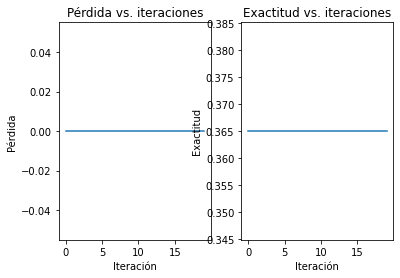

In [ ]:
plt.subplot(1,2,1)
plt.plot(historia.history['loss'])
plt.title('Pérdida vs. iteraciones')
plt.ylabel('Pérdida')
plt.xlabel('Iteración')

plt.subplot(1,2,2)
plt.plot(historia.history['accuracy'])
plt.title('Exactitud vs. iteraciones')
plt.ylabel('Exactitud')
plt.xlabel('Iteración')

plt.show()

**PRECISION**

In [ ]:
# Calcular la precisión sobre el set de validación
puntaje = modelo.evaluate(X_test,y_test,verbose=0)
print('Precisión en el set de validación: {:.1f}%'.format(100*puntaje[1]))


Precisión en el set de validación: 38.0%


**EJEMPLOS Y LA EXACTITUD DEL ENTRENAMIENTO**

In [ ]:
# Realizar predicción sobre el set de validación y mostrar algunos ejemplos
# de la clasificación resultante
metrica = modelo.evaluate(X_test, y_test)
print('Exactitud: ', metrica[1])



4/4 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - accuracy: 0.3800
Exactitud:  0.3799999952316284
